In [2]:
import numpy as np
import matplotlib.pyplot as plt

## cosmic ray detector response 
blow is a simulated set of energys vs time for cosmic rays that hit a detector with the given impuse reponse funciton.  (this models a heat capacity that heats up and cools down).

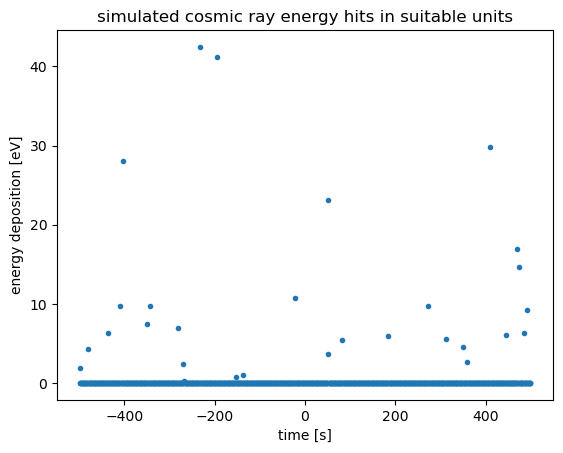

(-30.0, 30.0)

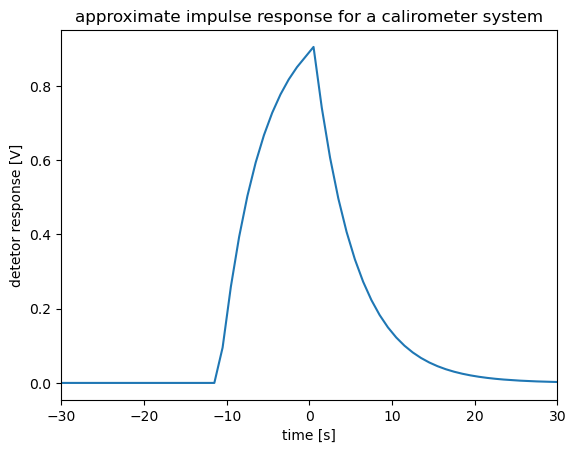

In [39]:
N = 1000
delta_t = 1.
t= np.arange(N) * delta_t
t-=np.mean(t)

n_hits = 30
CR_energy = np.zeros(N)
CR_energy[np.random.choice(N,n_hits)] = np.random.exponential(10,n_hits)

plt.title("simulated cosmic ray energy hits in suitable units")
plt.ylabel("energy deposition [eV]")
plt.xlabel("time [s]")
plt.plot(t,CR_energy,".")
plt.show()

tau = 5. 


response = np.zeros(N)
response[int(N/2):] = np.exp(-t[int(N/2):]/tau)
response[int(N/2)-11:int(N/2)] = (np.flip(1 - np.exp(t[:int(N/2)]/tau)))[0:11]

plt.title("approximate impulse response for a calirometer system")
plt.ylabel("detetor response [V]")
plt.xlabel("time [s]")
plt.plot(t, response)
plt.xlim(-30,30)

   
## Problem 1:  

convolve the impuse response funcotion with the cosmic ray hits to generate a simulation of the detector output. Check the offsets to make sure the response is alligned properly with the cosmic ray events. Plot the response and the energy vs time on the same plot as your final result.  Your result should be the same size as the input arrays.

In [4]:
## your souluiton here



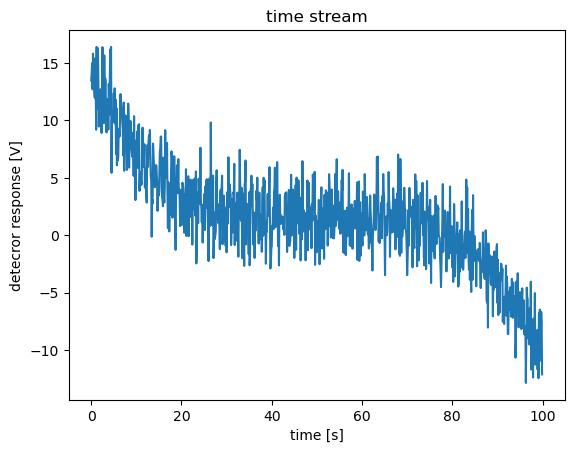

In [35]:
## a noisy spectrum

N = 1000
delta_t = 0.1
t = np.arange(N)*delta_t

data = np.sin(t*5)     ## the signal 
data += np.random.randn(N)*2  ## white noise
data += np.arange(N)/N*3 - 4* ((np.arange(N)-N/2)/N*3)**3  ## long time scale drifts

plt.plot(t,data)
plt.title("time stream")
plt.xlabel("time [s]")
plt.ylabel("detecror response [V]")
plt.show()

# Problem 2

compute the power specturm of the data above.  Plot the spectrum with and with out a suitbale window.  Estimate the S/N at which you detect the signal.   

# problem 3

define a filter to isolate the signal from the data.  make a plot of the filter on top of your PSD, and make a plot of the filtered time stream after apppying the filter.

# problem 4

generate a realization of noise with the given power specturm.  Plot the PSD of the your realization against that spectrum, and also show a plot of your spectrum in the time domain.  All plots should have labels and titles.

/var/folders/m7/7b5b0md11s94qw3vntzmxw7r0000gn/T/ipykernel_1593/1957195525.py:14: RuntimeWarning: invalid value encountered in power
  PS +=  ((f+1e-12)/f_0)**index  ## 1/f noise, in this case "kolmogrov"


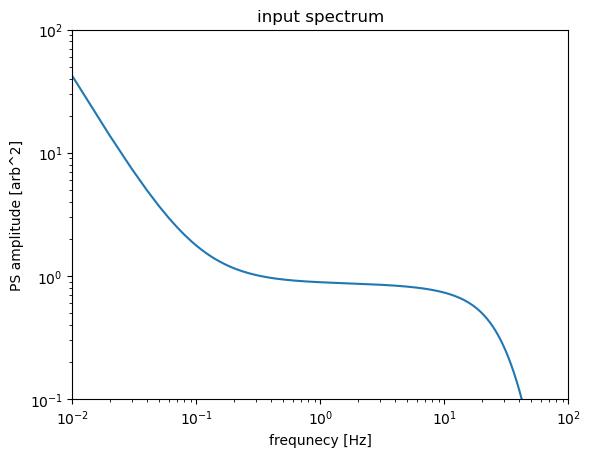

In [36]:
N = 10000
delta_t = 0.01

## paramters for the "pink" / "1/f" noise
f_0 = 0.1
index = -5/3.
## paramters for the roll off
f_roll = 20.
alpha = 20.

f  = np.fft.fftfreq(N,delta_t)  ## make a frequncy array 

PS = 1 ## white noise
PS +=  ((f+1e-12)/f_0)**index  ## 1/f noise, in this case "kolmogrov"
PS *=  (1 - np.tanh((f-f_roll)/alpha))/2  ## detector roll off 

plt.loglog(f,PS)
plt.ylim(0.1,100)
plt.xlim(0.01,100)
plt.title("input spectrum")
plt.xlabel("frequnecy [Hz]")
plt.ylabel("PS amplitude [arb^2]")
plt.show()